https://blog.csdn.net/mr_muli/article/details/84780561

机器学习之集成学习AdaBoostClassifier分类器



staged_score(X, Y):返回每个基分类器的预测准确率。

estimator 一个初始化的分类器，比如SVC

In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble


def load_data_classification():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。
    元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    # 使用 scikit-learn 自带的 digits数据集
    digits=datasets.load_digits()  
    # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
    return cross_validation.train_test_split(digits.data,digits.target,
    test_size=0.25,random_state=0,stratify=digits.target) 
    
    
def test_AdaBoostClassifier(*data):
    '''
    测试 AdaBoostClassifier 的用法，绘制 AdaBoostClassifier 的预测性能随基础分类器数量的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()   


def test_AdaBoostClassifier_base_classifier(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随基础分类器数量和基础分类器的类型的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    from sklearn.naive_bayes import GaussianNB
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(2,1,1)
    ########### 默认的个体分类器 #############
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Decision Tree")
    ####### Gaussian Naive Bayes 个体分类器 ########
    ax=fig.add_subplot(2,1,2)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1,base_estimator=GaussianNB())
    clf.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    plt.show()


def test_AdaBoostClassifier_learning_rate(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随学习率的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,n_estimators=500)
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(learning_rates,traing_scores,label="Traing score")
    ax.plot(learning_rates,testing_scores,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()


def test_AdaBoostClassifier_algorithm(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随学习率和 algorithm 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    algorithms=['SAMME.R','SAMME']
    fig=plt.figure()
    learning_rates=[0.05,0.1,0.5,0.9]
    for i,learning_rate in enumerate(learning_rates):
        ax=fig.add_subplot(2,2,i+1)
        for i ,algorithm in enumerate(algorithms):
            clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,
				algorithm=algorithm)
            clf.fit(X_train,y_train)
            ## 绘图
            estimators_num=len(clf.estimators_)
            X=range(1,estimators_num+1)
            ax.plot(list(X),list(clf.staged_score(X_train,y_train)),
				label="%s:Traing score"%algorithms[i])
            ax.plot(list(X),list(clf.staged_score(X_test,y_test)),
				label="%s:Testing score"%algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_title("learing rate:%f"%learning_rate)
    fig.suptitle("AdaBoostClassifier")
    plt.show()




D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


两者的主要区别是弱学习器权重的度量，SAMME使用了和我们的原理篇里二元分类Adaboost算法的扩展，即用对样本集分类效果作为弱学习器权重，而SAMME.R使用了对样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。


其实也挺好理解的，samme就是基学习器直接输出分类的标签，而samme.R则是输出分类的概率值，具体的区别下面写，首先是SAMME:

In [3]:
plt.rcParams['figure.figsize'] = (20.0, 16.0)

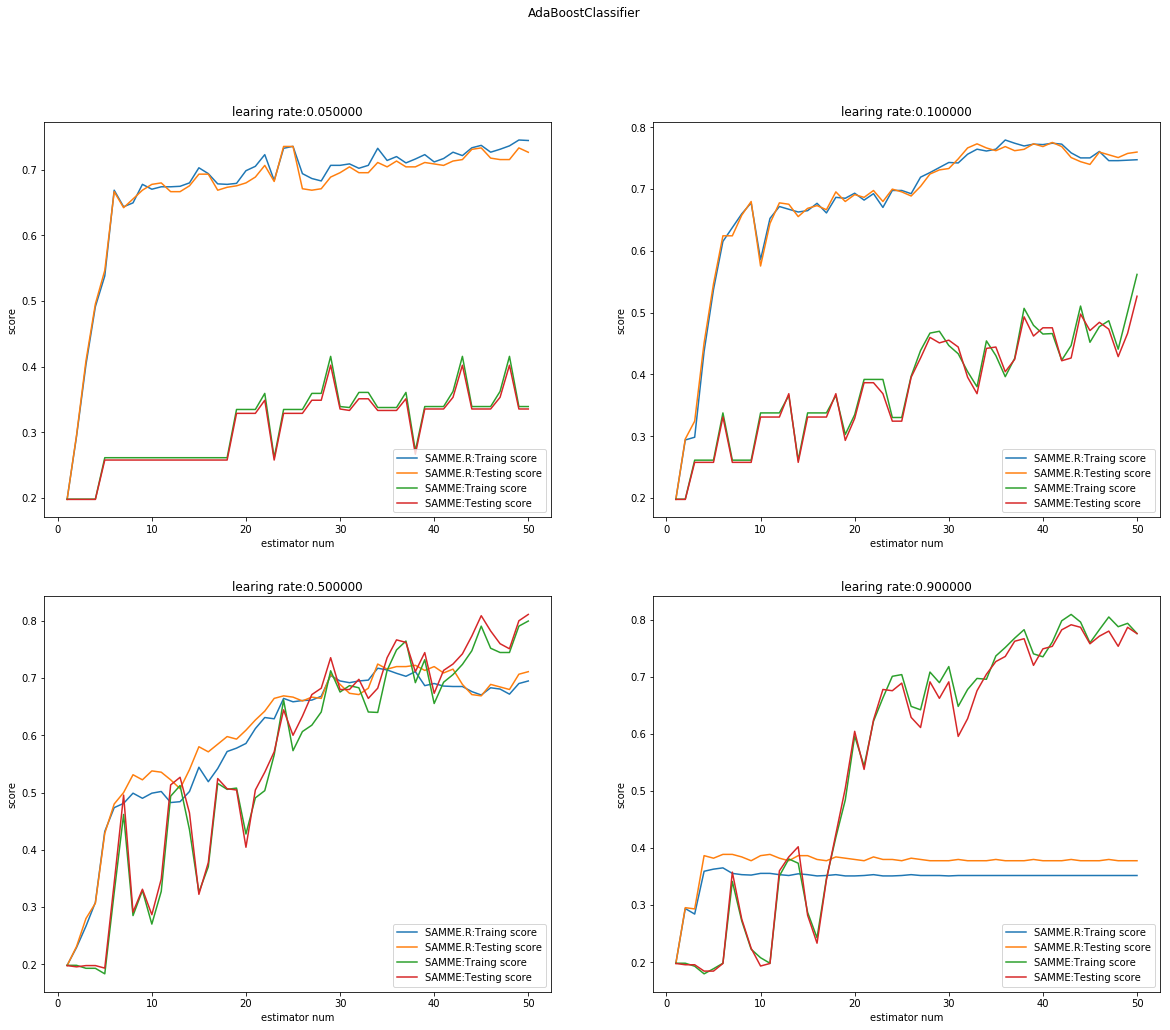

In [4]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_classification() # 获取分类数据
#    test_AdaBoostClassifier(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier
#    test_AdaBoostClassifier_base_classifier(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier_base_classifier
#    test_AdaBoostClassifier_learning_rate(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier_learning_rate
    test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier_algorithm

In [ ]:
plt.rcParams['figure.figsize'] = (20.0, 16.0)

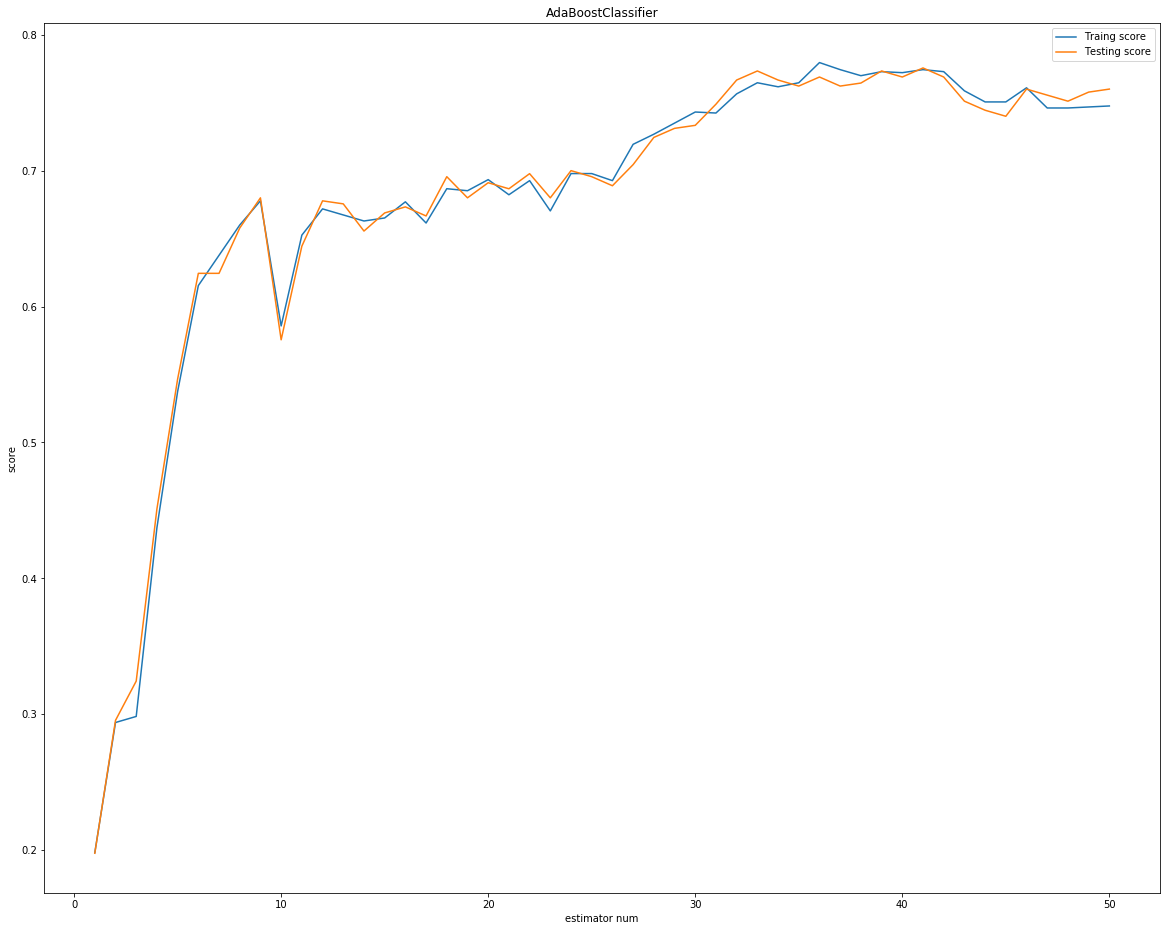

In [5]:
test_AdaBoostClassifier(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier

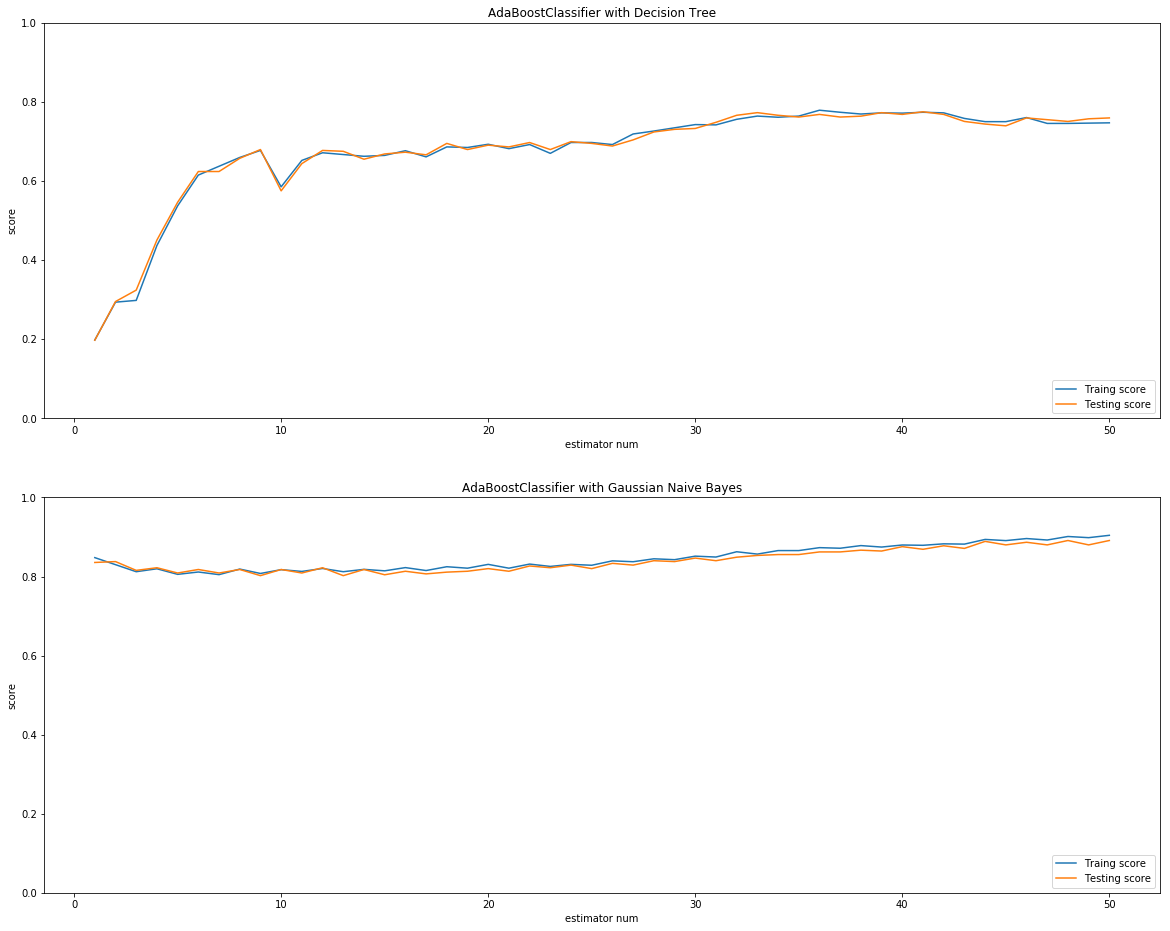

In [6]:
test_AdaBoostClassifier_base_classifier(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier_base_classifier

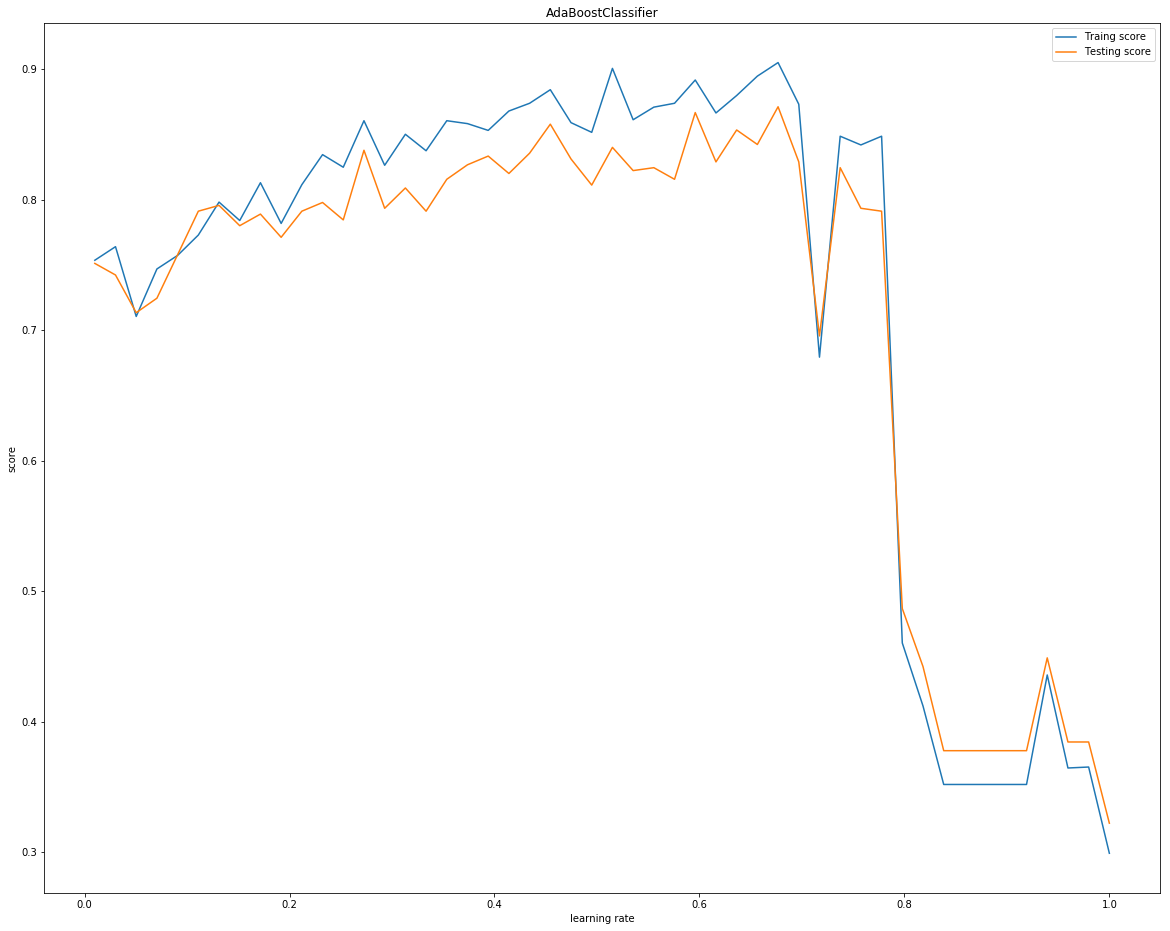

In [7]:
test_AdaBoostClassifier_learning_rate(X_train,X_test,y_train,y_test) # 调用 test_AdaBoostClassifier_learning_rate

### Multi-class AdaBoosted Decision Trees

https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py

Automatically created module for IPython interactive environment


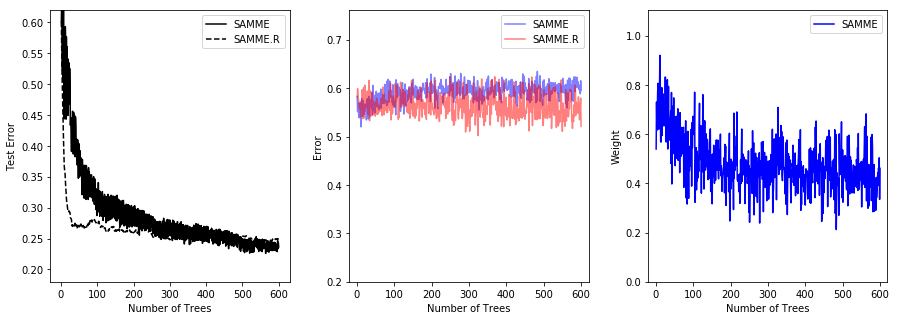

In [8]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
                               n_classes=3, random_state=1)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

Text(0.5,0,'Number of Trees')

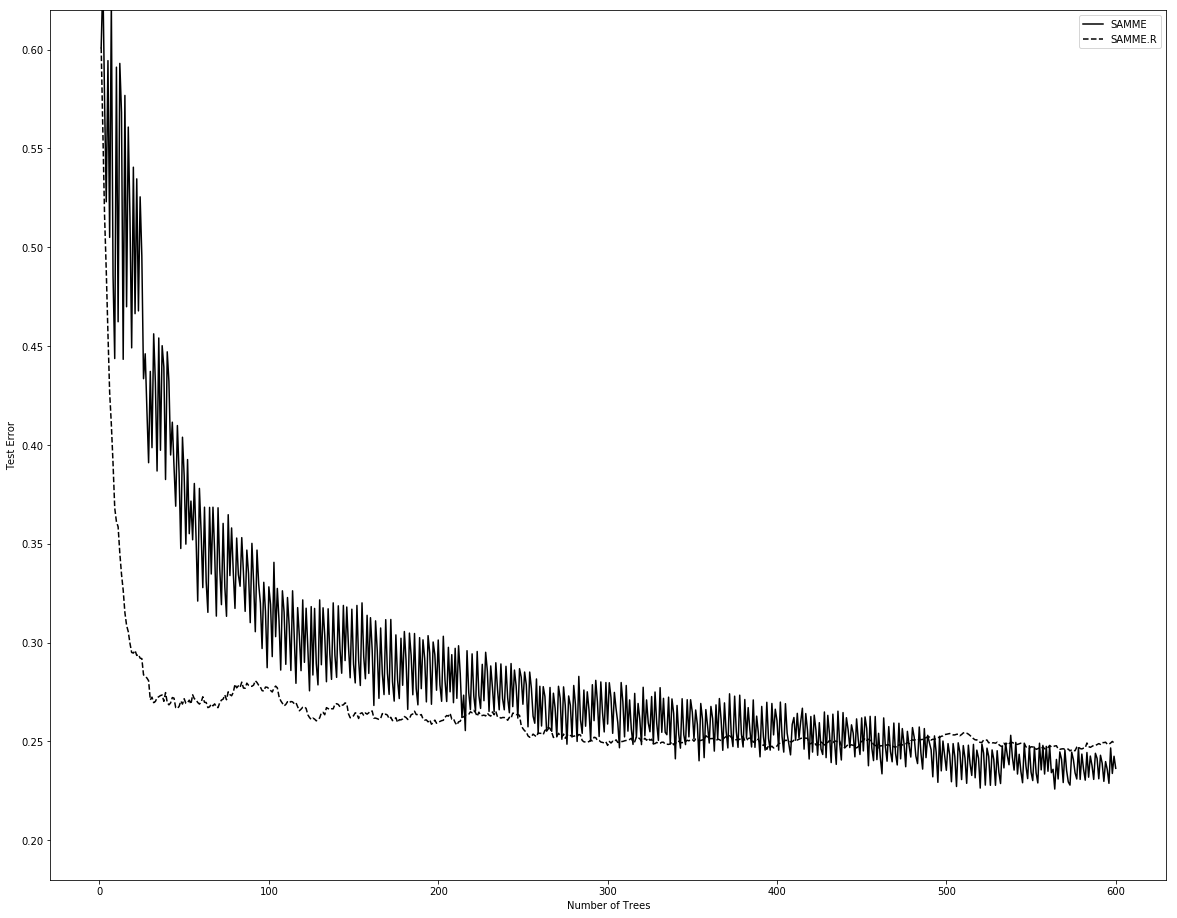

In [9]:

plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')


(-20, 620)

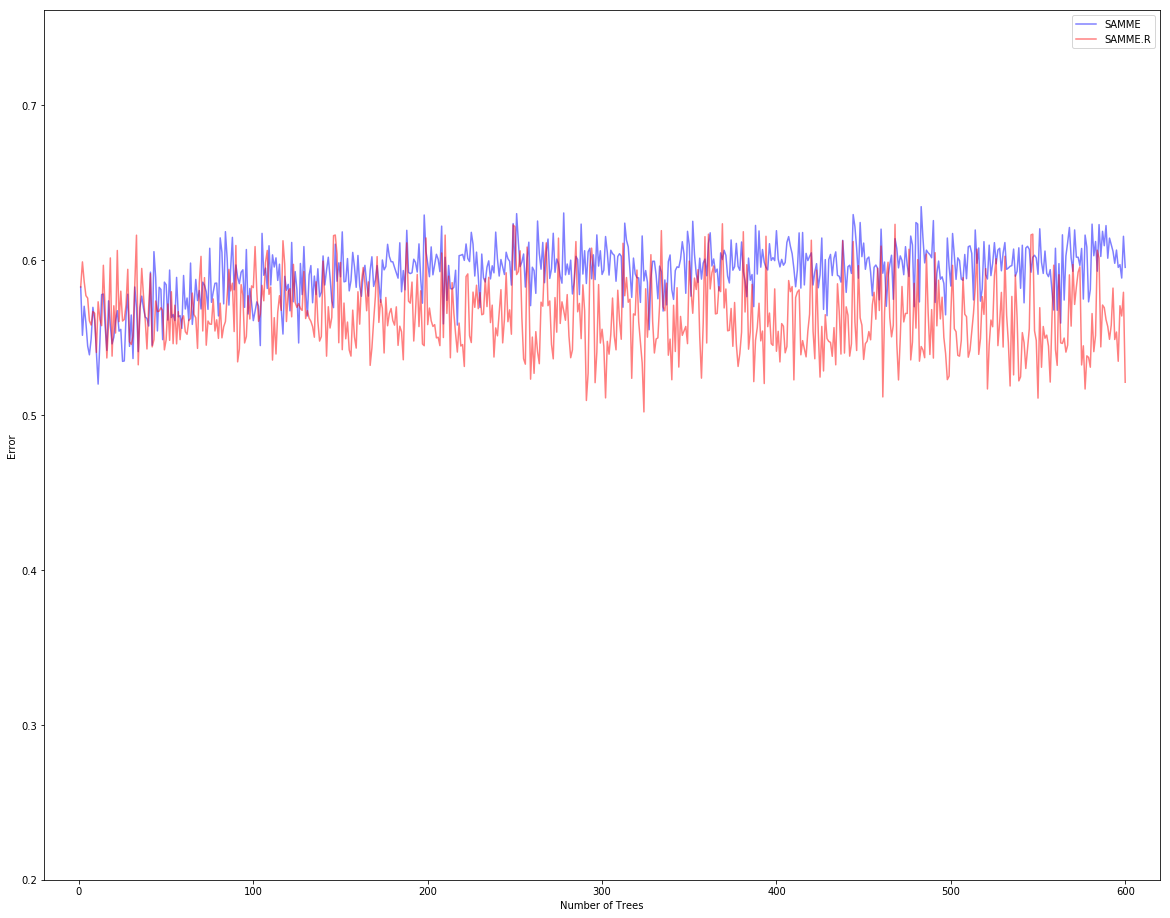

In [10]:

plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))



(-20, 620)

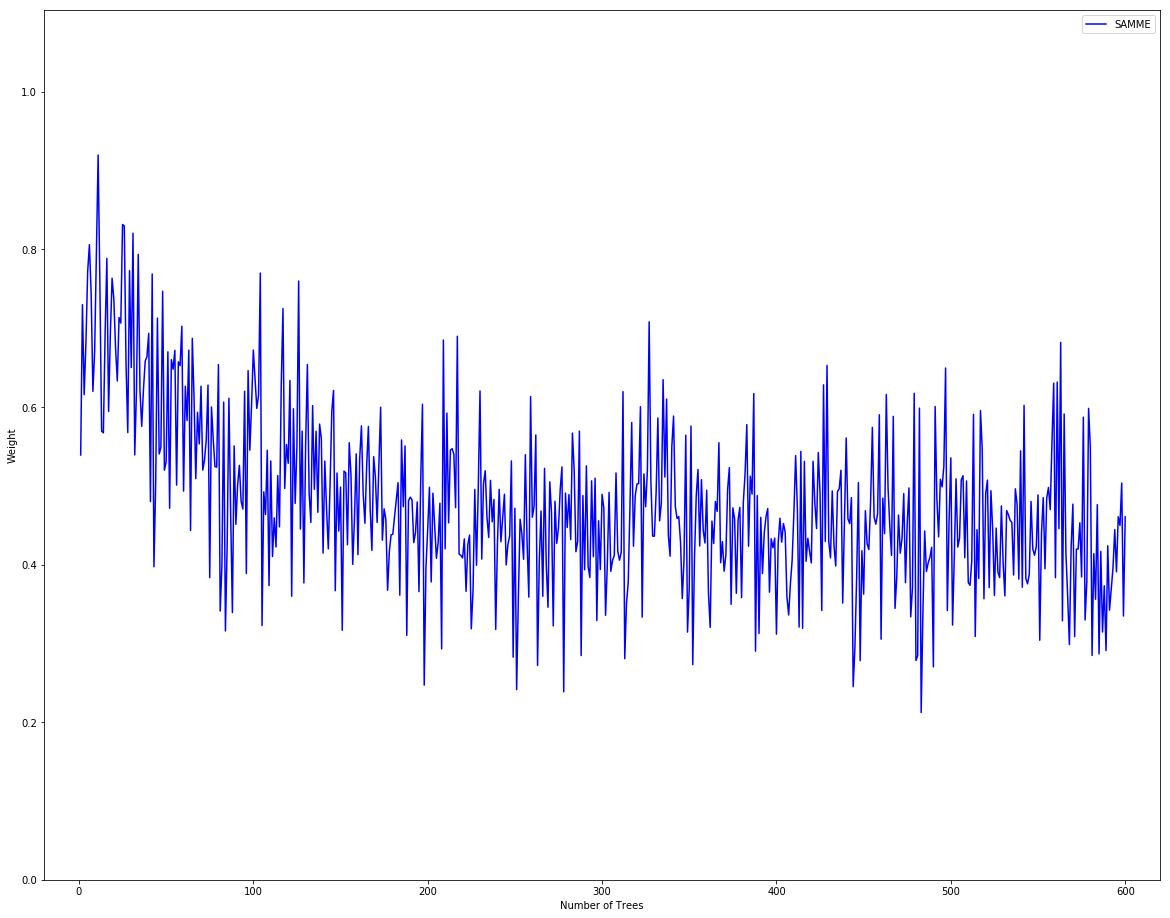

In [11]:

plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))



In [12]:

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

<Figure size 1440x1152 with 0 Axes>

【AdaBoostClassifier】

#### Adaboost-参数：

#### base_estimator:基分类器，

默认是决策树，在该分类器基础上进行boosting，理论上可以是任意一个分类器，但是如果是其他分类器时需要指明样本权重。

#### n_estimators:基分类器提升（循环）次数，

默认是50次，这个值过大，模型容易过拟合；值过小，模型容易欠拟合。

#### learning_rate:学习率，

表示梯度收敛速度，默认为1，如果过大，容易错过最优值，如果过小，则收敛速度会很慢；该值需要和n_estimators进行一个权衡，当分类器迭代次数较少时，学习率可以小一些，当迭代次数较多时，学习率可以适当放大。

#### algorithm:boosting算法，

也就是模型提升准则，有两种方式SAMME, 和SAMME.R两种，默认是SAMME.R，两者的区别主要是弱学习器权重的度量，前者是对样本集预测错误的概率进行划分的，后者是对样本集的预测错误的比例，即错分率进行划分的，默认是用的SAMME.R。

#### random_state:随机种子设置。

关于Adaboost模型本身的参数并不多，但是我们在实际中除了调整Adaboost模型参数外，还可以调整基分类器的参数，关于基分类的调参，和单模型的调参是完全一样的，比如默认的基分类器是决策树，那么这个分类器的调参和我们之前的Sklearn参数详解——决策树是完全一致。

Adaboost-对象

#### estimators_:以列表的形式返回所有的分类器。

#### classes_:类别标签

#### estimator_weights_:每个分类器权重

#### estimator_errors_:每个分类器的错分率，

与分类器权重相对应。

#### feature_importances_:特征重要性，

这个参数使用前提是基分类器也支持这个属性。

Adaboost-方法

#### decision_function(X):返回决策函数值（比如svm中的决策距离）

#### fit(X,Y):在数据集（X,Y）上训练模型。

#### get_parms():获取模型参数

#### predict(X):预测数据集X的结果。

#### predict_log_proba(X):预测数据集X的对数概率。

#### predict_proba(X):预测数据集X的概率值。

#### score(X,Y):输出数据集（X,Y）在模型上的准确率。

#### staged_decision_function(X):返回每个基分类器的决策函数值

#### staged_predict(X):返回每个基分类器的预测数据集X的结果。

#### staged_predict_proba(X):返回每个基分类器的预测数据集X的概率结果。

#### staged_score(X, Y):返回每个基分类器的预测准确率。

生成随机数据：https://www.cnblogs.com/pinard/p/6047802.html

https://cuijiahua.com/blog/2017/11/ml_10_adaboost.html

机器学习实战教程（十）：提升分类器性能利器-AdaBoost

In [17]:
# -*-coding:utf-8 -*-
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


def loadDataSet(fileName):
	numFeat = len((open(fileName).readline().split('\t')))
	dataMat = []; labelMat = []
	fr = open(fileName)
	for line in fr.readlines():
		lineArr = []
		curLine = line.strip().split('\t')
		for i in range(numFeat - 1):
			lineArr.append(float(curLine[i]))
		dataMat.append(lineArr)
		labelMat.append(float(curLine[-1]))

	return dataMat, labelMat

def plotROC(predStrengths, classLabels):
	"""
	绘制ROC
	Parameters:
		predStrengths - 分类器的预测强度
		classLabels - 类别
	Returns:
		无
	"""
	font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
	cur = (1.0, 1.0) 														#绘制光标的位置
	ySum = 0.0 																#用于计算AUC
	numPosClas = np.sum(np.array(classLabels) == 1.0)						#统计正类的数量
	yStep = 1 / float(numPosClas) 											#y轴步长	
	xStep = 1 / float(len(classLabels) - numPosClas) 						#x轴步长

	sortedIndicies = predStrengths.argsort() 								#预测强度排序,从低到高
	fig = plt.figure()
	fig.clf()
	ax = plt.subplot(111)
	for index in sortedIndicies.tolist()[0]:
		if classLabels[index] == 1.0:
			delX = 0; delY = yStep
		else:
			delX = xStep; delY = 0
			ySum += cur[1] 													#高度累加
		ax.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c = 'b') 	#绘制ROC
		cur = (cur[0] - delX, cur[1] - delY) 								#更新绘制光标的位置
	ax.plot([0,1], [0,1], 'b--')
	plt.title('AdaBoost马疝病检测系统的ROC曲线', FontProperties = font)
	plt.xlabel('假阳率', FontProperties = font)
	plt.ylabel('真阳率', FontProperties = font)
	ax.axis([0, 1, 0, 1])
	print('AUC面积为:', ySum * xStep) 										#计算AUC
	plt.show()

    
if __name__ == '__main__':
	dataArr, classLabels = loadDataSet('horseColicTraining2.txt')
	testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
	bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), algorithm = "SAMME", n_estimators = 10)
	bdt.fit(dataArr, classLabels)
	predictions = bdt.predict(dataArr)
	errArr = np.mat(np.ones((len(dataArr), 1)))
	print('训练集的错误率:%.3f%%' % float(errArr[predictions != classLabels].sum() / len(dataArr) * 100))
	predictions = bdt.predict(testArr)
	errArr = np.mat(np.ones((len(testArr), 1)))
	print('测试集的错误率:%.3f%%' % float(errArr[predictions != testLabelArr].sum() / len(testArr) * 100))


训练集的错误率:16.054%
测试集的错误率:17.910%
